In [1]:
library(TSA)
library(mgcv)



Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


Date,Temp
195001,46.8
195002,51.9
195003,54.1
195004,58.1
195005,58.1


[1] 828

[1] 46.8 51.9 54.1 58.1 58.1

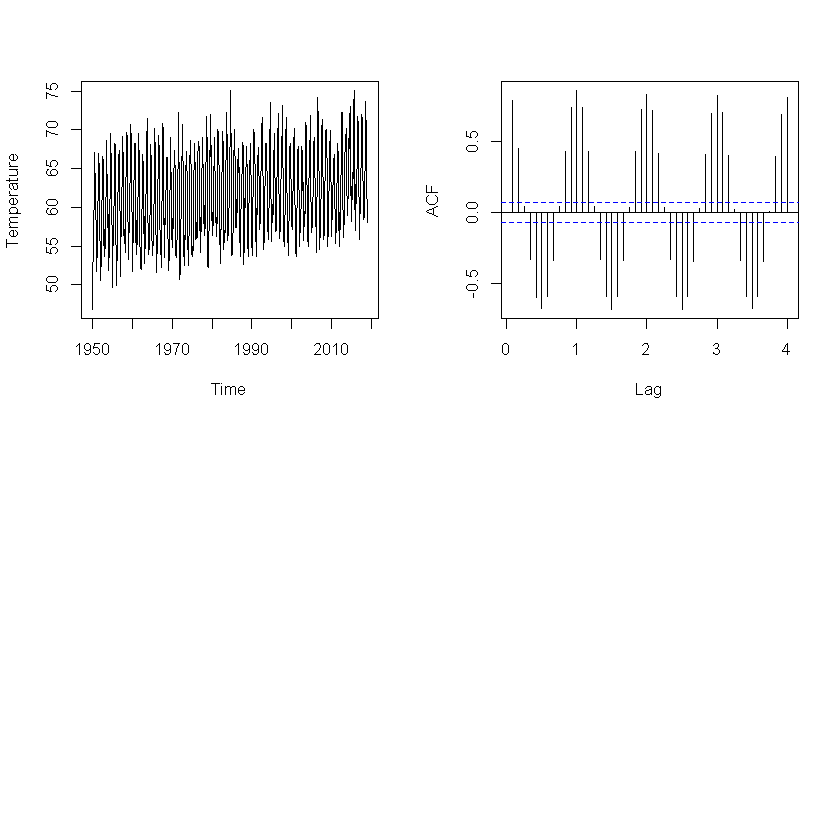

In [21]:
data=read.csv("LA Temp Monthly.csv", header=TRUE)
head(data, n=5)
nrow(data)

data=data[,2]
head(data, n=5)

par(mfrow=c(2,2))
temp =ts(data,start=c(1950,1),freq=12)


ts.plot(temp,ylab="Temperature")
acf(temp,lag.max=12*4,main="")


[1] 61.76944

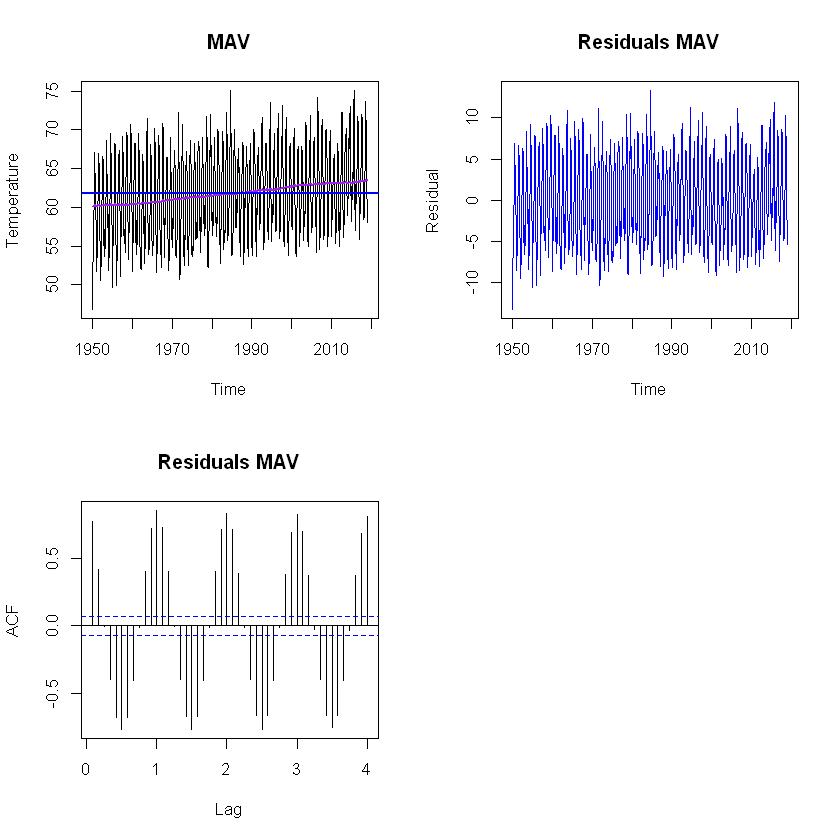

In [25]:
#Moving avrage
time.pts = c(1:length(temp))
time.pts = c(time.pts - min(time.pts))/max(time.pts)

mav.fit = ksmooth(time.pts, temp, kernel = "box")
temp.fit.mav = ts(mav.fit$y,start=1950,frequency=12)

av=mean(temp)
av

par(mfrow=c(2,2))
ts.plot(temp,ylab="Temperature", main="MAV")
lines(temp.fit.mav,lwd=2,col="purple")
abline(av,0,lwd=2,col="blue")

ts.plot(temp-temp.fit.mav,ylab="Residual", col="blue", main="Residuals MAV")
acf(temp-temp.fit.mav,lag.max=12*4,main=" Residuals MAV ", ylab="ACF")



Call:
lm(formula = temp ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9226  -4.4207  -0.2526   4.6385  13.4337 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  59.7226     0.5489 108.809   <2e-16 ***
x1            3.1639     2.5384   1.246    0.213    
x2            1.4030     2.4606   0.570    0.569    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.277 on 825 degrees of freedom
Multiple R-squared:  0.05925,	Adjusted R-squared:  0.05697 
F-statistic: 25.98 on 2 and 825 DF,  p-value: 1.143e-11


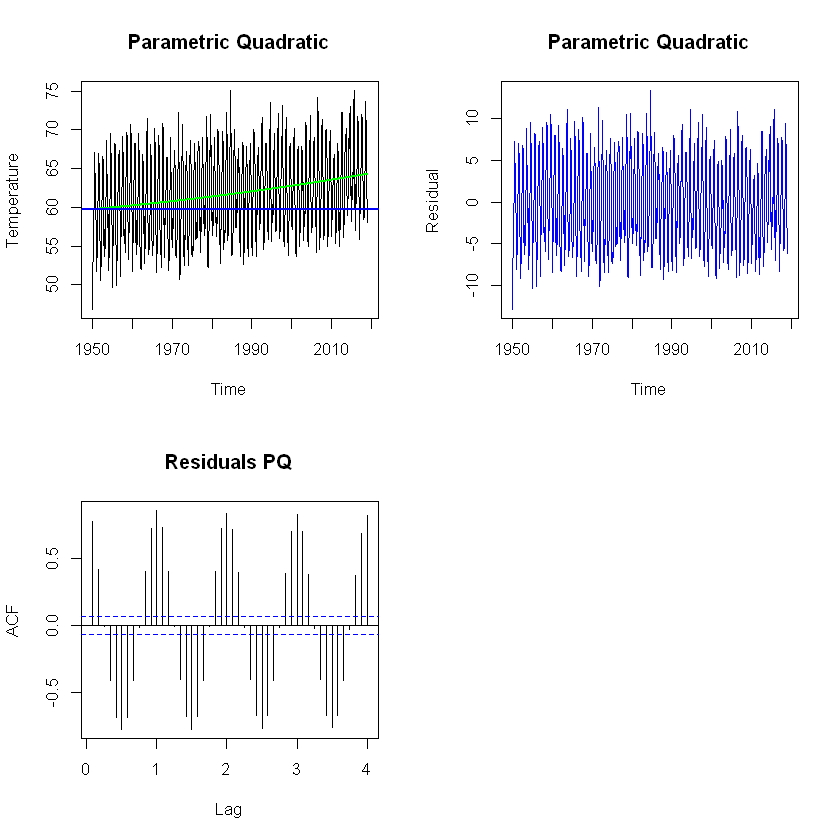

In [26]:
#Parametric quadratic polynomial method
x1 = time.pts
x2 = time.pts^2
lm.fit = lm(temp~x1+x2)
summary(lm.fit)

par(mfrow=c(2,2))
lm.fit = lm(temp~x1+x2)
temp.fit.lm = ts(fitted(lm.fit),start=1950,frequency=12)
ts.plot(temp,ylab="Temperature", main="Parametric Quadratic")
lines(temp.fit.lm,lwd=2,col="green")
abline(temp.fit.lm[1],0,lwd=2,col="blue")


dif.fit.PQ = ts((temp-fitted(lm.fit)),start=1950,frequency=12)
ts.plot(dif.fit.PQ,ylab="Residual", col="blue", main="Parametric Quadratic")

acf(dif.fit.PQ,lag.max=12*4,main="Residuals PQ", ylab="ACF")



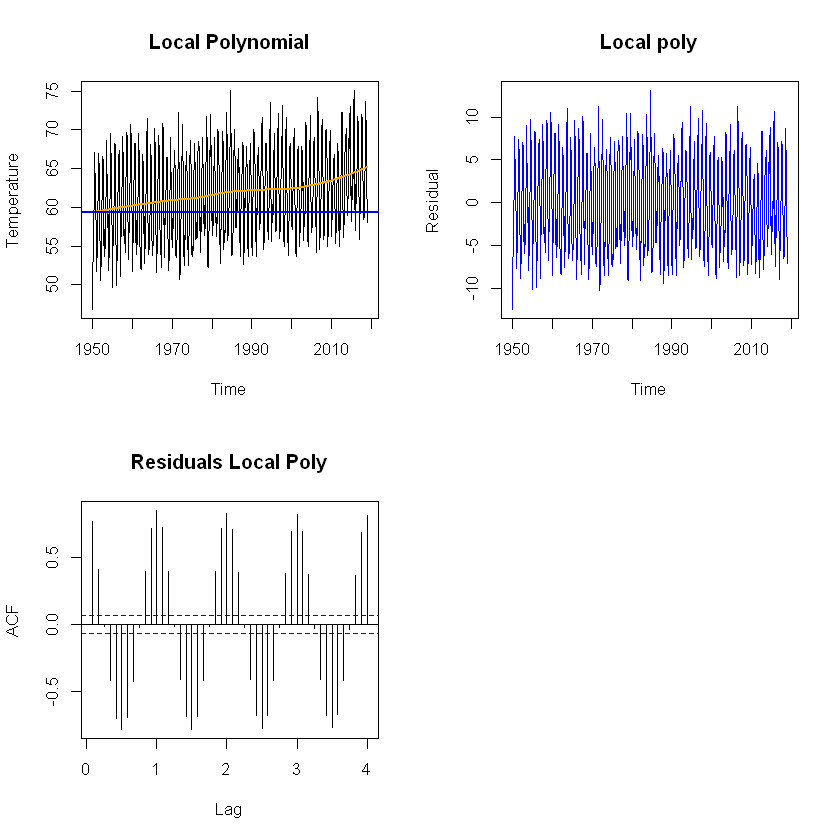

In [28]:
#Local Polynomial method
loc.fit = loess(temp~time.pts)
temp.fit.loc = ts(fitted(loc.fit),start=1950,frequency=12)

par(mfrow=c(2,2))
ts.plot(temp,ylab="Temperature", main="Local Polynomial")
lines(temp.fit.loc,lwd=2,col="orange")
abline(temp.fit.loc[1],0,lwd=2,col="blue")

dif.fit.loc = ts((temp-fitted(loc.fit)),start=1950,frequency=12)
ts.plot(dif.fit.loc,ylab="Residual", col="blue", main="Local poly")

acf(dif.fit.loc,lag.max=12*4,main="Residuals Local Poly", ylab="ACF")


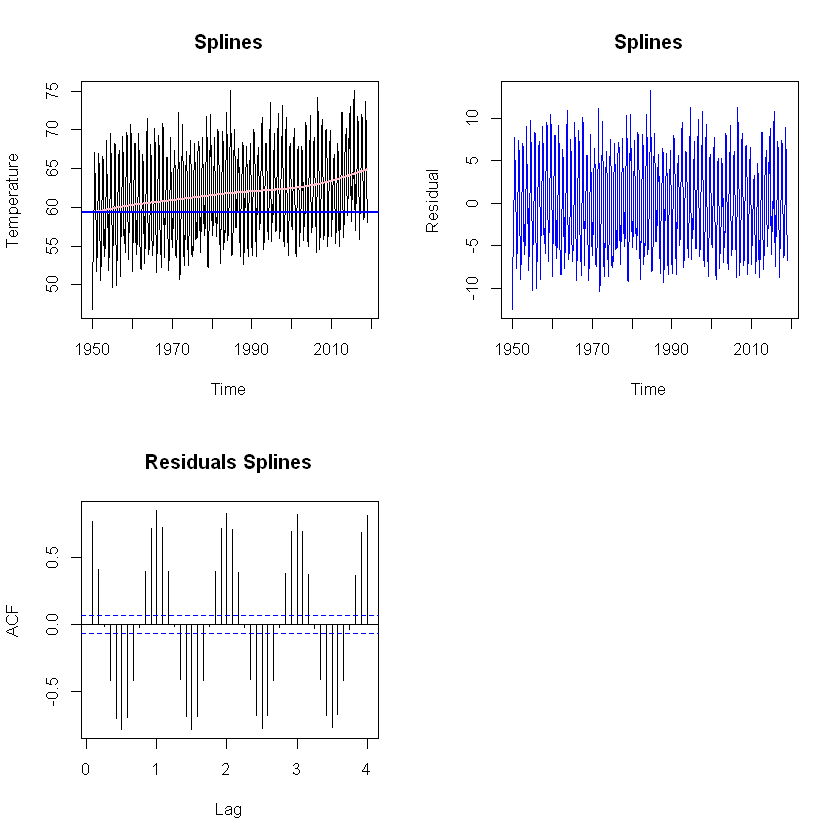

In [29]:
#Splines method
library(mgcv)
gam.fit = gam(temp~s(time.pts))
temp.fit.gam = ts(fitted(gam.fit),start=1950,frequency=12)

par(mfrow=c(2,2))
ts.plot(temp,ylab="Temperature", main="Splines")
lines(temp.fit.gam,lwd=2,col="pink")
abline(temp.fit.gam[1],0,lwd=2,col="blue")

dif.fit.gam = ts((temp-fitted(gam.fit)),start=1950,frequency=12)
ts.plot(dif.fit.gam,ylab="Residual", col="blue", main="Splines")

acf(dif.fit.gam,lag.max=12*4,main="Residuals Splines", ylab="ACF")


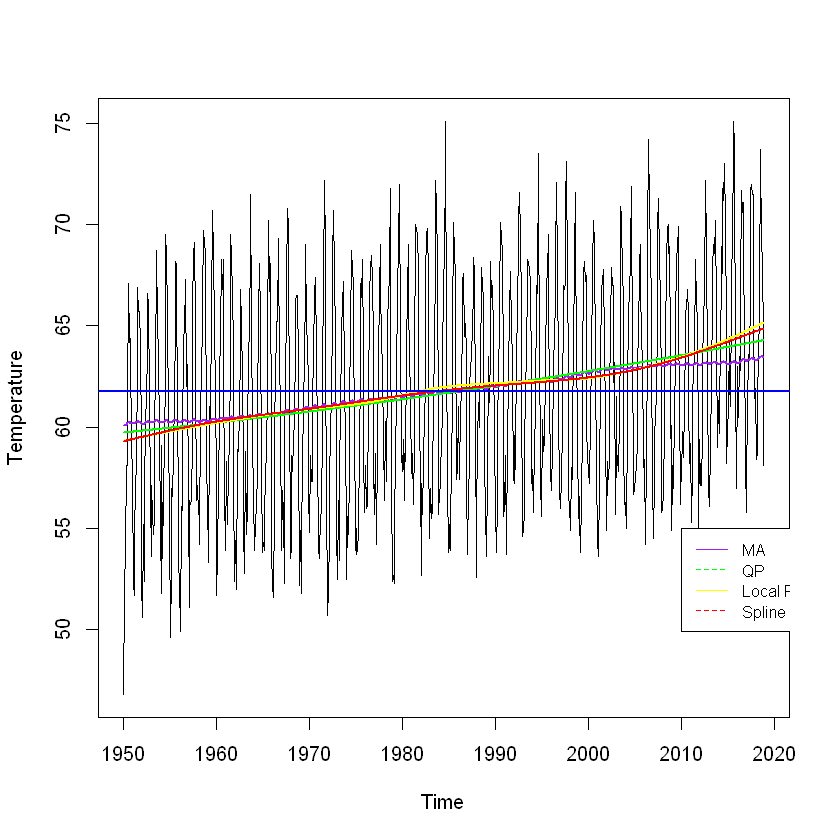

In [30]:
#All graphs together:
ts.plot(temp,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
lines(temp.fit.lm,lwd=2,col="green")
lines(temp.fit.loc,lwd=2,col="yellow")
lines(temp.fit.gam,lwd=2,col="red")
abline(av,0,lwd=2,col="blue")
legend(x=2010, y=55, legend=c("MA", "QP", "Local P", "Spline"), col=c("purple", "green", "yellow", "red"), lty=1:2, cex=0.8)



Call:
lm(formula = temp ~ month - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7145 -1.5855 -0.0319  1.6000  8.6768 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
monthJanuary    55.5145     0.2864   193.9   <2e-16 ***
monthFebruary   56.2565     0.2864   196.5   <2e-16 ***
monthMarch      57.0478     0.2864   199.2   <2e-16 ***
monthApril      59.1333     0.2864   206.5   <2e-16 ***
monthMay        61.5942     0.2864   215.1   <2e-16 ***
monthJune       64.6159     0.2864   225.7   <2e-16 ***
monthJuly       67.9565     0.2864   237.3   <2e-16 ***
monthAugust     68.9826     0.2864   240.9   <2e-16 ***
monthSeptember  68.3000     0.2864   238.5   <2e-16 ***
monthOctober    65.3232     0.2864   228.1   <2e-16 ***
monthNovember   60.4754     0.2864   211.2   <2e-16 ***
monthDecember   56.0333     0.2864   195.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.379 on 816 degrees of freedom


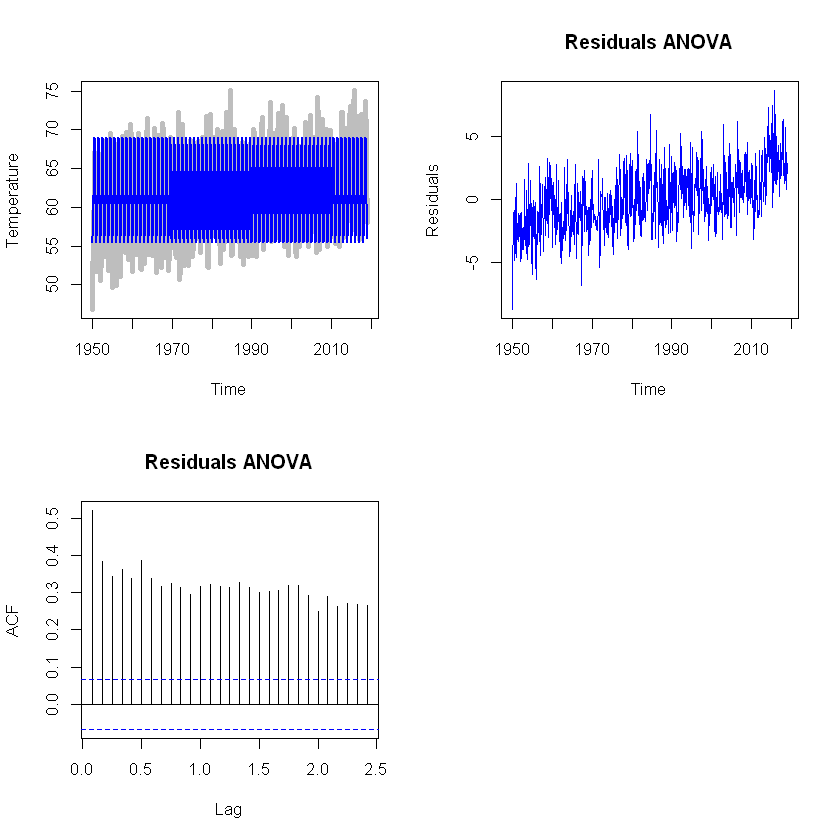

In [32]:
#Question 1c: Seasonality Estimation
#ANOVA model-without intercept
month = season(temp)
model2 = lm(temp~month-1)
summary(model2)

par(mfrow=c(2,2))
model2.ts = ts(fitted(model2),start=1950,frequency=12)
ts.plot(temp,ylab="Temperature", col="gray", lwd=4)
lines(model2.ts, col="blue", lwd=2)


resids.model2 = residuals(model2)
resids.model2.ts = ts(resids.model2,start=1950,freq=12)
ts.plot(resids.model2.ts,ylab="Residuals", main="Residuals ANOVA", col="blue")


acf(resids.model2.ts,y="ACF", main="Residuals ANOVA")



Call:
lm(formula = temp ~ har)

Residuals:
   Min     1Q Median     3Q    Max 
-8.789 -1.742 -0.109  1.573  9.391 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    61.76944    0.08786  703.06   <2e-16 ***
harcos(2*pi*t) -6.18023    0.12425  -49.74   <2e-16 ***
harsin(2*pi*t) -2.83955    0.12425  -22.85   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.528 on 825 degrees of freedom
Multiple R-squared:  0.7841,	Adjusted R-squared:  0.7836 
F-statistic:  1498 on 2 and 825 DF,  p-value: < 2.2e-16


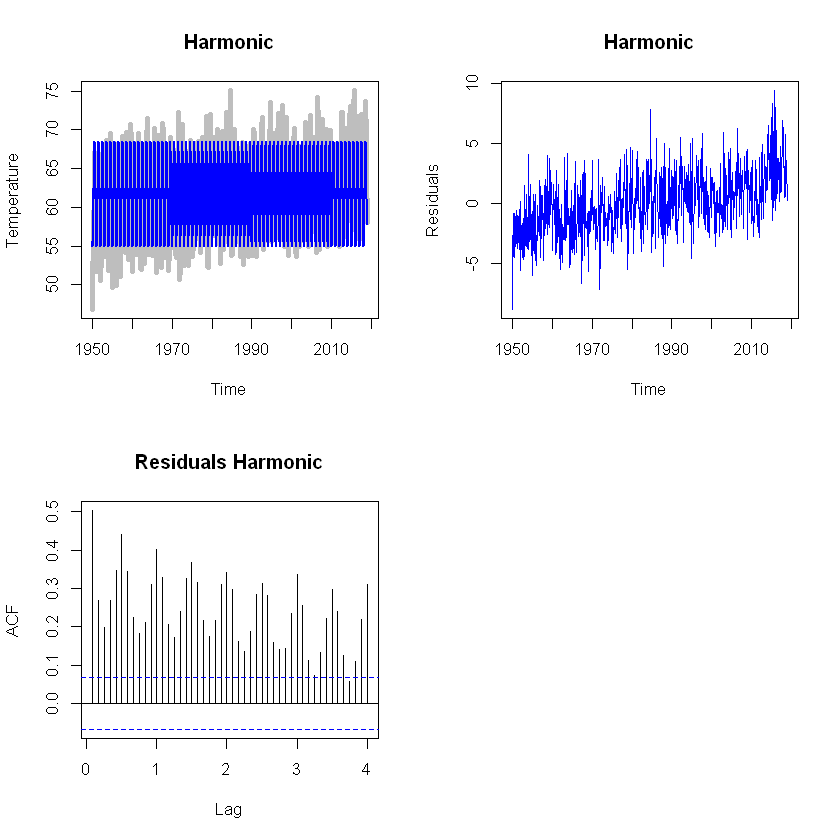

In [36]:
#Harmonic model
har=harmonic(temp,1)
model3=lm(temp~har)
summary(model3)
model3.ts = ts(fitted(model3),start=1950,frequency=12)

par(mfrow=c(2,2))
ts.plot(temp,ylab="Temperature", col="gray", lwd=4, main="Harmonic")
lines(model3.ts, col="blue", lwd=2)



resids.model3 = residuals(model3)
resids.model3.ts = ts(resids.model3,start=1950,freq=12)
ts.plot(resids.model3.ts,ylab="Residuals", main="Harmonic", col="blue")
acf(resids.model3.ts,ylab="ACF", main="Residuals Harmonic", lag=4*12)




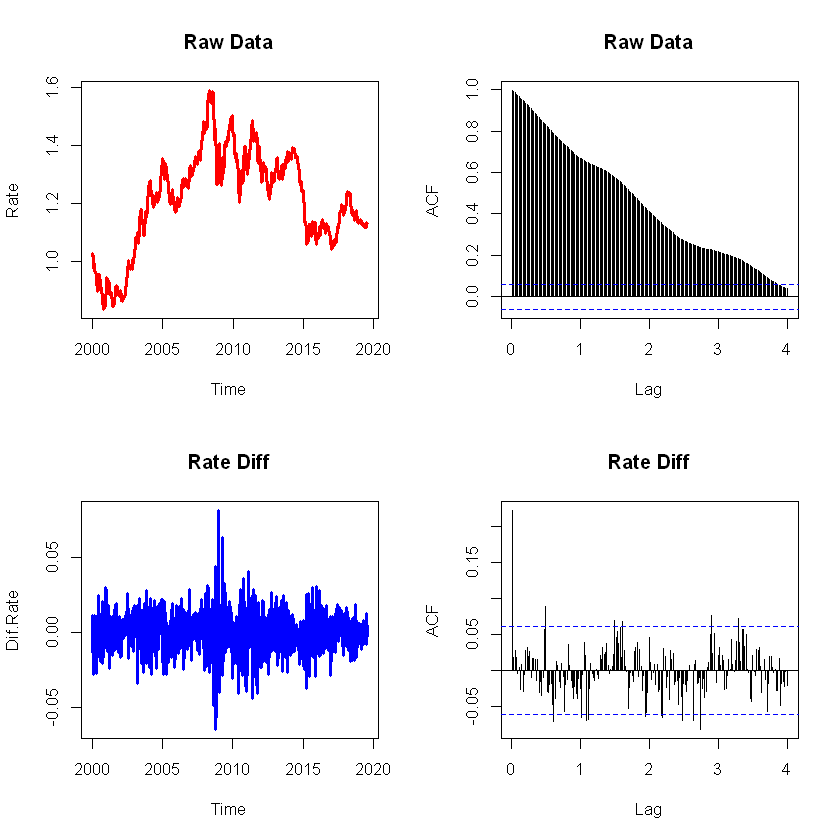

In [39]:
#Question 2: Currency Conversion Analysis 

data=read.csv("Exchange.csv", header=TRUE)
rate = ts(data[,2],start=c(2000,1),frequency=52)

par(mfrow=c(2,2))
ts.plot(rate,ylab="Rate", main="Raw Data", col="red", lwd=3)
acf(rate,lag.max=52*4,main="Raw Data")


rate.dif = diff(rate)
rate.dif.ts = ts(rate.dif,start=c(2000,2),frequency=52)
ts.plot(rate.dif.ts,ylab="Dif.Rate", col="blue", lwd=3, main="Rate Diff")
acf(rate.dif.ts,lag.max=52*4,main="Rate Diff")



Call:
lm(formula = rate ~ x1 + x2 + week)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.211931 -0.066917 -0.002785  0.062843  0.246424 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.8368860  0.0214713  38.977   <2e-16 ***
x1             1.9761760  0.0389215  50.773   <2e-16 ***
x2            -1.8031330  0.0377232 -47.799   <2e-16 ***
weekSeason-2   0.0009811  0.0283243   0.035    0.972    
weekSeason-3  -0.0008022  0.0283243  -0.028    0.977    
weekSeason-4  -0.0093104  0.0283243  -0.329    0.742    
weekSeason-5  -0.0102119  0.0283243  -0.361    0.719    
weekSeason-6  -0.0089664  0.0283243  -0.317    0.752    
weekSeason-7  -0.0099945  0.0283243  -0.353    0.724    
weekSeason-8  -0.0105335  0.0283243  -0.372    0.710    
weekSeason-9  -0.0111946  0.0283244  -0.395    0.693    
weekSeason-10 -0.0116752  0.0283244  -0.412    0.680    
weekSeason-11 -0.0089694  0.0283244  -0.317    0.752    
weekSeason-12 -0.0129212  0.02

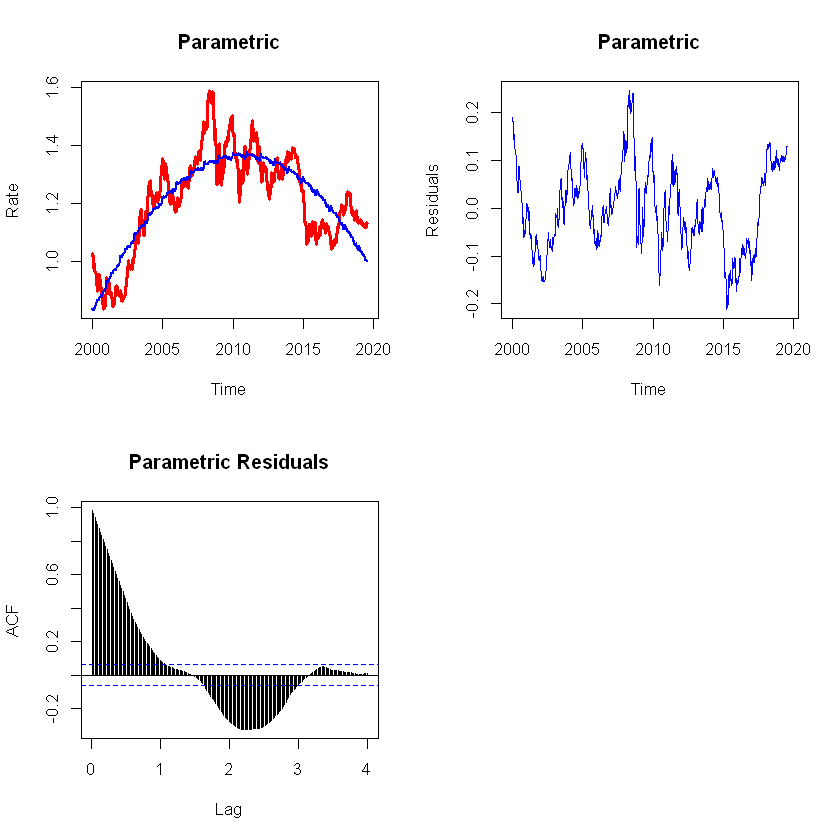

In [41]:
#Question 2b: Trend-Seasonality Estimation
time.pts = c(1:length(rate))
time.pts = c(time.pts - min(time.pts))/max(time.pts)
x1 = time.pts
x2 = time.pts^2
week= season(rate)
model.TSpar=lm(rate~x1+x2+week)
model.TSpar.ts = ts(fitted(model.TSpar),start=c(2000,1),frequency=52)

par(mfrow=c(2,2))
ts.plot(rate,ylab="Rate", col="red", lwd=3, main="Parametric")
lines(model.TSpar.ts, col="blue", lwd=2)


resids.TSpar = residuals(model.TSpar)
resids.TSpar.ts = ts(resids.TSpar,start=c(2000,1),freq=52)
ts.plot(resids.TSpar.ts,ylab="Residuals", main="Parametric", col="blue")
acf(resids.TSpar.ts,lag.max=52*4,main="Parametric Residuals", ylab="ACF")


summary(model.TSpar)


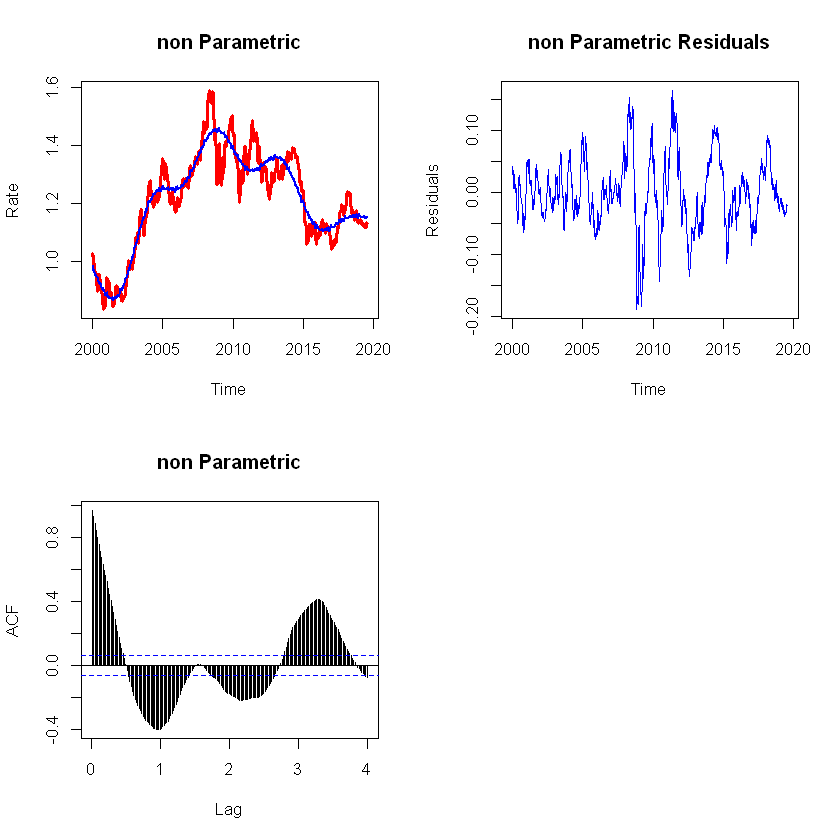

In [43]:
week= season(rate)
model.TSgam=gam(rate~s(time.pts) +week)
model.TSgam.ts = ts(fitted(model.TSgam),start=c(2000,1),frequency=52)

par(mfrow=c(2,2))
ts.plot(rate,ylab="Rate", col="red", lwd=3, main="non Parametric")
lines(model.TSgam.ts, col="blue", lwd=2)

resids.TSgam = residuals(model.TSgam)
resids.TSgam.ts = ts(resids.TSgam,start=c(2000,1),freq=52)
ts.plot(resids.TSgam.ts,main="non Parametric Residuals", col="blue", ylab="Residuals")
acf(resids.TSgam.ts,lag.max=52*4,main="non Parametric", ylab="ACF")




Call:
lm(formula = rate.dif ~ x1 + x2 + week)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059778 -0.008413  0.001074  0.008683  0.077160 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)    3.307e-03  3.405e-03   0.971   0.3317  
x1            -1.117e-04  5.999e-03  -0.019   0.9851  
x2            -1.550e-03  5.814e-03  -0.267   0.7898  
weekSeason-2  -1.551e-03  4.421e-03  -0.351   0.7259  
weekSeason-3  -4.317e-03  4.421e-03  -0.976   0.3291  
weekSeason-4  -1.104e-02  4.421e-03  -2.498   0.0127 *
weekSeason-5  -3.439e-03  4.421e-03  -0.778   0.4369  
weekSeason-6  -1.294e-03  4.421e-03  -0.293   0.7699  
weekSeason-7  -3.569e-03  4.421e-03  -0.807   0.4197  
weekSeason-8  -3.082e-03  4.421e-03  -0.697   0.4859  
weekSeason-9  -3.206e-03  4.421e-03  -0.725   0.4685  
weekSeason-10 -3.027e-03  4.421e-03  -0.685   0.4937  
weekSeason-11  1.574e-04  4.421e-03   0.036   0.9716  
weekSeason-12 -6.502e-03  4.421e-03  -1.471   0.1417  

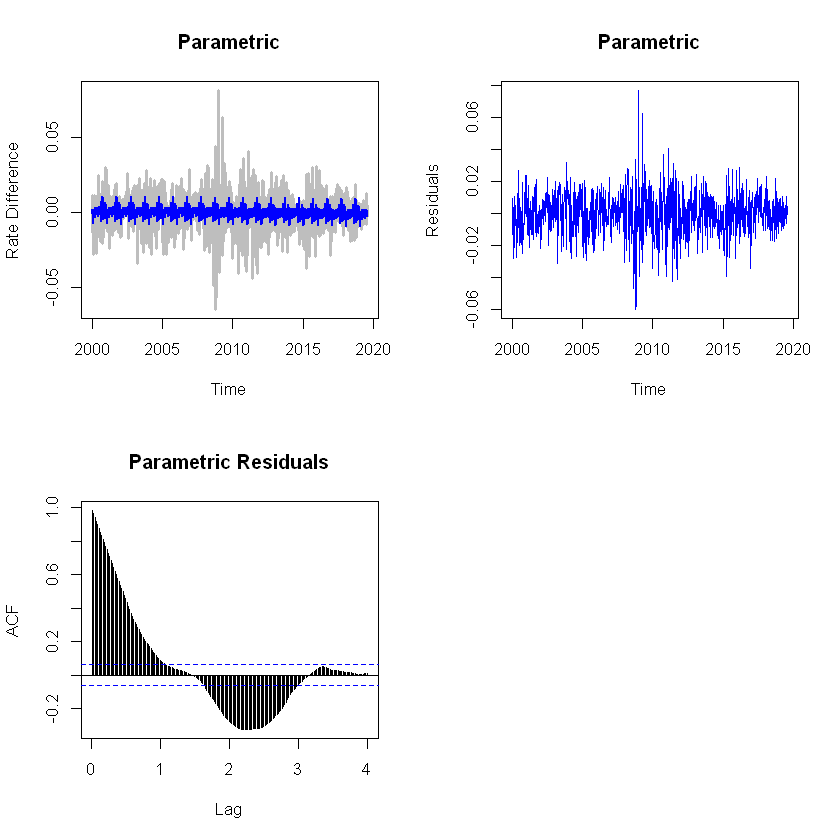

In [46]:
#Question 2c: Trend-Seasonality Estimation with Differenced Data

rate.dif = diff(rate)
rate.dif = ts(rate.dif,start=c(2000,2),frequency=52)


library(TSA)
time.pts = c(1:length(rate.dif))
time.pts = c(time.pts - min(time.pts))/max(time.pts)
x1 = time.pts
x2 = time.pts^2
week= season(rate.dif)
model.TSpar.diff=lm(rate.dif~x1+x2+week)
TSpar.diff= ts(fitted(model.TSpar.diff),start=c(2000,2),frequency=52)

par(mfrow=c(2,2))
ts.plot(rate.dif,ylab="Rate Difference", col="gray", lwd=3, main="Parametric")
lines(TSpar.diff, col="blue", lwd=2)

summary(model.TSpar.diff)


resids.TSpar.diff = residuals(model.TSpar.diff)
resids.TSpar.diff.ts = ts(resids.TSpar.diff,start=c(2000,2),freq=52)
ts.plot(resids.TSpar.diff.ts,main="Parametric", col="blue", ylab="Residuals")
acf(resids.TSpar.ts,lag.max=52*4,main="Parametric Residuals", ylab="ACF")



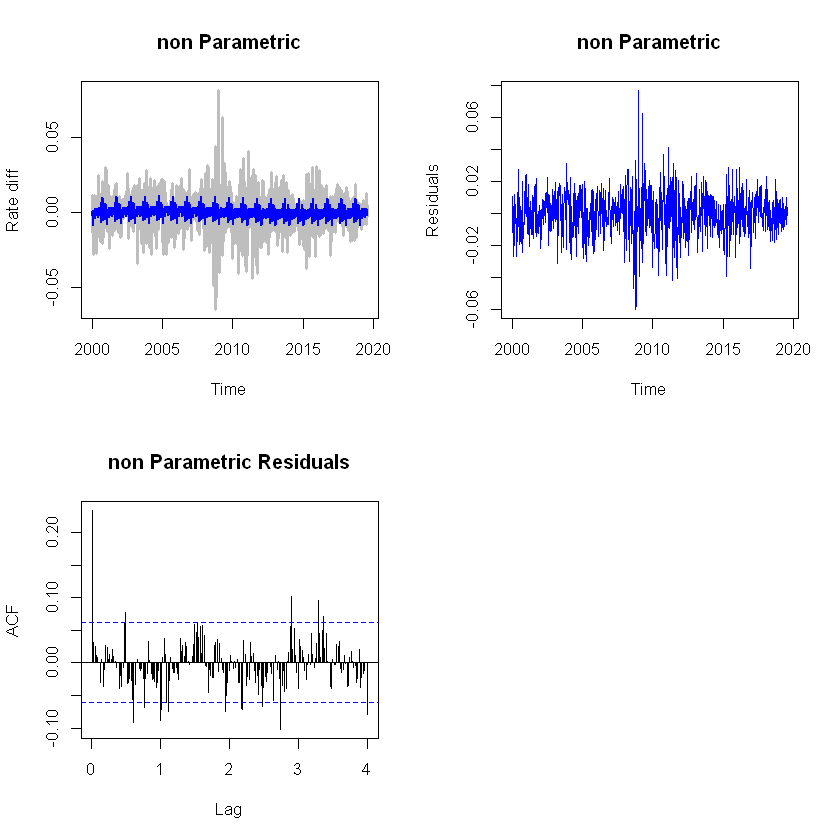

In [48]:
week= season(rate.dif)
model.TSgam.diff=gam(rate.dif~s(time.pts) +week)
TSgam.diff.ts = ts(fitted(model.TSgam.diff),start=c(2000,2),frequency=52)


par(mfrow=c(2,2))
ts.plot(rate.dif,ylab="Rate diff", col="gray", lwd=3, main="non Parametric")
lines(TSgam.diff.ts, col="blue", lwd=2)


resids.TSgam.diff = residuals(model.TSgam.diff)
resids.TSgam.diff.ts = ts(resids.TSgam.diff,start=c(2000,2),freq=52)
ts.plot(resids.TSgam.diff.ts,main="non Parametric", col="blue", ylab="Residuals")
acf(resids.TSgam.diff.ts,lag.max=52*4,main="non Parametric Residuals", ylab="ACF")
